In [1]:
run imports.py

### EDA

In [2]:
fueleco = pd.read_csv("data/vehicles.csv.zip")
fueleco.head(2)

/tmp/ipykernel_4770/3517446167.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv("data/vehicles.csv.zip")


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
print(fueleco.dtypes); print(fueleco.dtypes.value_counts())

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object
float64    32
int64      27
object     23
bool        1
dtype: int64


In [4]:
fueleco.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
barrels08,39101.0,17.442712,4.580230,0.06,14.33087,17.347895,20.115,47.087143
barrelsA08,39101.0,0.219276,1.143837,0.00,0.00000,0.000000,0.000,18.311667
charge120,39101.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000,0.000000


In [5]:
fueleco.describe(include=object)

,drive,eng_dscr,fuelType,fuelType1,make,model,mpgData,trany,VClass,guzzler,...,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop
count,37912,23431,39101,39101,39101,39101,39101,39090,39101,2335,...,3204,1490,1485,644,8289,53,51,39101,39101,7405
unique,7,545,14,6,134,3816,2,37,34,3,...,8,4,216,125,46,5,4,195,68,2
top,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Chevrolet,F150 Pickup 2WD,N,Automatic 4-spd,Compact Cars,G,...,FFV,E85,290,288V Ni-MH,GMX,standard charger,80 amp dual charger,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,N
freq,13653,8827,25620,26931,3900,214,26400,11045,5661,1356,...,1383,1383,74,117,1255,42,42,34199,29438,5176


In [6]:
fueleco.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [7]:
fueleco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
dtype: int64

save memory

In [8]:
fueleco.make.nunique()

134

In [9]:
fueleco[["make"]].info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   make    39101 non-null  object
dtypes: object(1)
memory usage: 2.4 MB


In [10]:
(
     fueleco[["make"]]
     .assign(make=fueleco.make.astype("category"))
     .info(memory_usage="deep")
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   make    39101 non-null  category
dtypes: category(1)
memory usage: 89.5 KB


In [11]:
fueleco[["model"]].info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   39101 non-null  object
dtypes: object(1)
memory usage: 2.5 MB


In [12]:
(
     fueleco[["model"]]
     .assign(model=fueleco.model.astype("category"))
     .info(memory_usage="deep")
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   model   39101 non-null  category
dtypes: category(1)
memory usage: 465.7 KB


#### Categorical data

In [13]:
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [14]:
fueleco.drive.nunique()

7

In [15]:
fueleco.drive.sample(4, random_state=42)

4217     4-Wheel or All-Wheel Drive
1736     4-Wheel or All-Wheel Drive
36029              Rear-Wheel Drive
37631             Front-Wheel Drive
Name: drive, dtype: object

In [16]:
print(fueleco.drive.isna().sum());
print(fueleco.drive.isna().mean() * 100)


1189
3.0408429451932175


In [17]:
fueleco.drive.value_counts() #summarize drive col

Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: drive, dtype: int64

 look at the top 6 and collapse the remaining values:

In [18]:
top_n = fueleco.make.value_counts().index[:6]

In [19]:
fueleco.make.where?

In [20]:
(
     fueleco.assign(
         make=fueleco.make.where(
             fueleco.make.isin(top_n), "Other"
         )
     ).make.value_counts()
)

Other        23211
Chevrolet     3900
Ford          3208
Dodge         2557
GMC           2442
Toyota        1976
BMW           1807
Name: make, dtype: int64

Use pandas to plot the counts and visualize them. Note!

<AxesSubplot:>

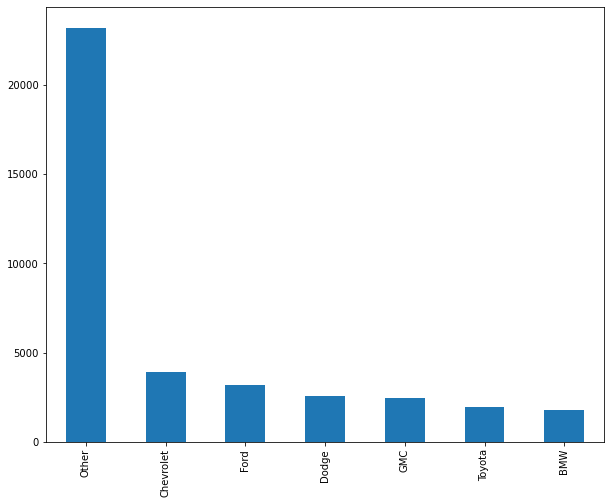

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
(
     fueleco.assign(  
         make=fueleco.make.where(
             fueleco.make.isin(top_n), "Other"
         )
     )
     .make.value_counts()
     .plot.bar(ax=ax)
)

<AxesSubplot:xlabel='count', ylabel='make'>

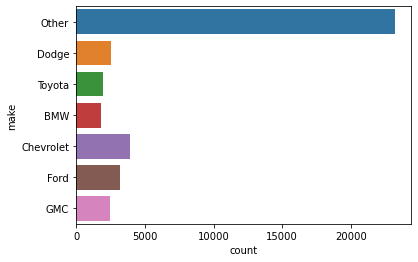

In [22]:
sns.countplot(
    y="make",  
    data=(
        fueleco.assign(
            make=fueleco.make.where(
                fueleco.make.isin(top_n), "Other"
            )
        )
    ),
)

In [23]:
fueleco.drive.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
39096    False
39097    False
39098    False
39099    False
39100    False
Name: drive, Length: 39101, dtype: bool

In [24]:
fueleco[fueleco.drive.isna()].head(2)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
7138,0.240,0.0,0.0,0.0,81,0.0,0,0.0,0.0,41.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8144,0.312,0.0,0.0,0.0,74,0.0,0,0.0,0.0,46.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0


In [25]:
fueleco.drive.value_counts(dropna=False)


Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: drive, dtype: int64

In [26]:
fueleco.rangeA.value_counts()
#there are slashes (/) and dashes (-) in some of the entries and pandas did not know how to convert those values to numbers, so it left the whole column as a string column.
#not really categorical, but a numeric column posing as a category.

290            74
270            56
280            53
310            41
277            38
               ..
351             1
240/290/290     1
303             1
340-350         1
341             1
Name: rangeA, Length: 216, dtype: int64

This is actually a column that has two types: float and string. The data type is reported as object because that type can hold heterogenous typed columns

In [27]:
(
     fueleco.rangeA.fillna("0")
     .str.replace("-", "/")
     .str.split("/", expand=True)
     .astype(float)
     .mean(axis=1) #secdtion one
     .pipe(lambda ser_: pd.cut(ser_, 10)) #binining
     .value_counts()
)

(-0.45, 44.95]     37688
(269.7, 314.65]      559
(314.65, 359.6]      352
(359.6, 404.55]      205
(224.75, 269.7]      181
(404.55, 449.5]       82
(89.9, 134.85]        12
(179.8, 224.75]        9
(44.95, 89.9]          8
(134.85, 179.8]        5
dtype: int64

cut and qcut. We can use cut to cut into equal-width bins, or bin widths that we specify

### Continuous data

In [28]:
fueleco.select_dtypes?

Pick out the columns that are numeric (typically int64 or float64

In [29]:
fueleco.select_dtypes("number")


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-1750,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-10500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,250,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-10500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-4750,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39096,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,24.0000,0.0,37.0000,0.0,1993,-1500,0.0,0,0,0
39097,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,25.0000,0.0,39.0000,0.0,1993,-1000,0.0,0,0,0
39098,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1750,0.0,0,0,0
39099,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1750,0.0,0,0,0


In [30]:
fueleco.city08.sample(5, random_state=42)

4217     11
1736     21
36029    16
37631    16
1668     17
Name: city08, dtype: int64

In [31]:
fueleco.city08.describe()

count    39101.000000
mean        18.077799
std          6.970672
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

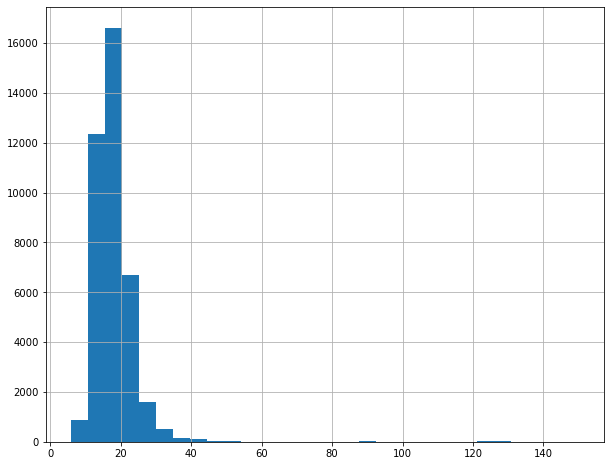

In [32]:
>>> fig, ax = plt.subplots(figsize=(10, 8))
>>> fueleco.city08.hist(ax=ax, bins=30);


/home/amalpjose/miniconda3/envs/lrnenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amalpjose/miniconda3/envs/lrnenv/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city08', ylabel='Density'>

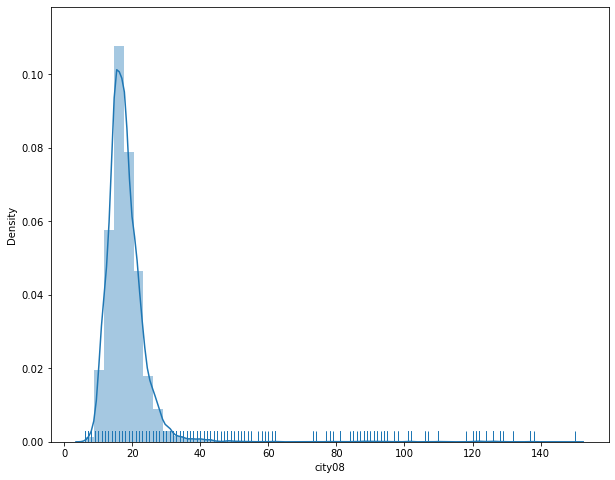

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(fueleco.city08, rug=True, ax=ax)


/home/amalpjose/miniconda3/envs/lrnenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amalpjose/miniconda3/envs/lrnenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amalpjose/miniconda3/envs/lrnenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

<AxesSubplot:xlabel='city08'>

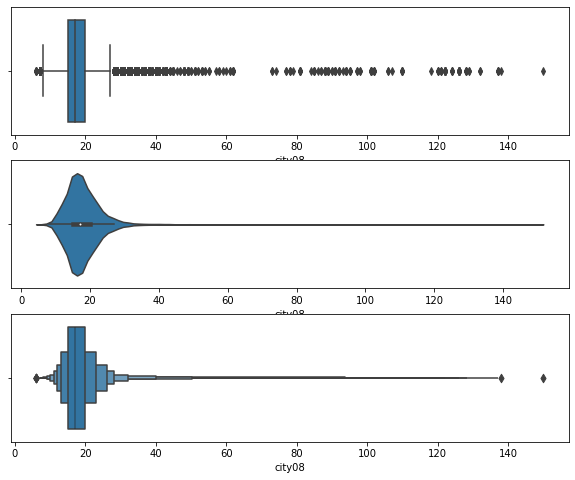

In [34]:
>>> fig, axs = plt.subplots(nrows=3, figsize=(10, 8)) #note!
>>> sns.boxplot(fueleco.city08, ax=axs[0])
>>> sns.violinplot(fueleco.city08, ax=axs[1])
>>> sns.boxenplot(fueleco.city08, ax=axs[2])

In [35]:
from scipy import stats

stats.kstest(fueleco.city08, cdf="norm")


KstestResult(statistic=0.9999999990134123, pvalue=0.0)

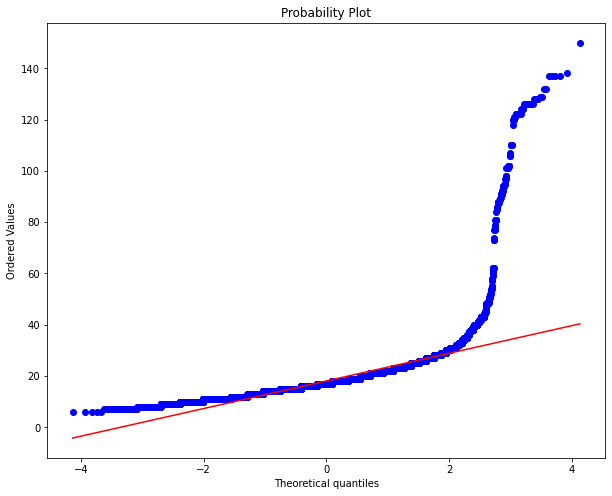

In [36]:
>>> fig, ax = plt.subplots(figsize=(10, 8))
>>> stats.probplot(fueleco.city08, plot=ax)
>>> fig.savefig("c5-conprob.png", dpi=300)

### Comparing continuous values across categories
We will look at mileage numbers in different brands: Ford, Honda, Tesla, and BMW.

How

In [37]:
mask = fueleco.make.isin(
     ["Ford", "Honda", "Tesla", "BMW"] #Return a boolean Series showing whether each element in the Series matches an element in the passed sequence of `values` exactly
) #value is in this list of labels. boolean

In [38]:
fueleco.make.isin?

In [39]:
fueleco[mask].groupby("make").city08.agg(
     ["mean", "std"]
)

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


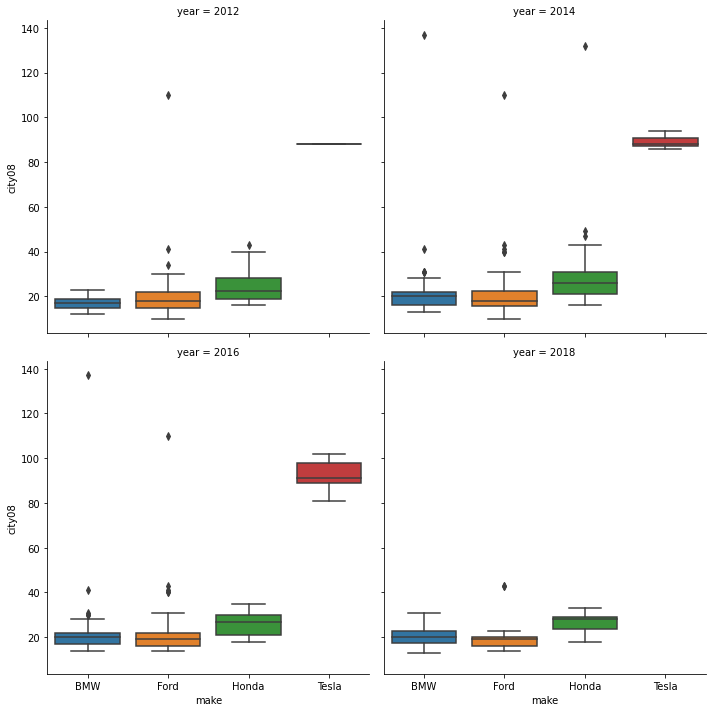

In [40]:
g = sns.catplot(
     x="make",
     y="city08",
     data=fueleco[mask],
     kind="box",
     col="year",
     col_order=[2012, 2014, 2016, 2018],
     col_wrap=2,
)

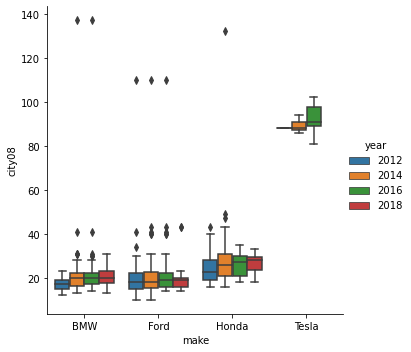

In [41]:
g = sns.catplot(
   x="make",
   y="city08", 
   data=fueleco[mask],
   kind="box",
   hue="year",
   hue_order=[2012, 2014, 2016, 2018],
)

In [42]:
mask = fueleco.make.isin(
     ["Ford", "Honda", "Tesla", "BMW"]
)

In [43]:
(fueleco[mask].groupby("make").city08.count())

make
BMW      1807
Ford     3208
Honda     925
Tesla      46
Name: city08, dtype: int64

In [44]:
(
     fueleco[mask]
     .groupby("make")
     .city08.agg(["mean", "std"])
     .style.background_gradient(cmap="RdBu", axis=0)
)

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


### Comparing two continuous columns
Evaluating how two continuous columns relate to one another is the essence of regression. But it goes beyond that. If you have two columns with a high correlation to one another, often, you may drop one of them as a redundant column. 

In [45]:
print(fueleco.city08.cov(fueleco.highway08))
print(fueleco.city08.cov(fueleco.comb08))
print(fueleco.city08.cov(fueleco.cylinders))

46.33326023673625
47.41994667819079
-5.931560263764761


In [46]:
fueleco.city08.corr(fueleco.highway08)


0.932494506228495

/tmp/ipykernel_4770/1532646721.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

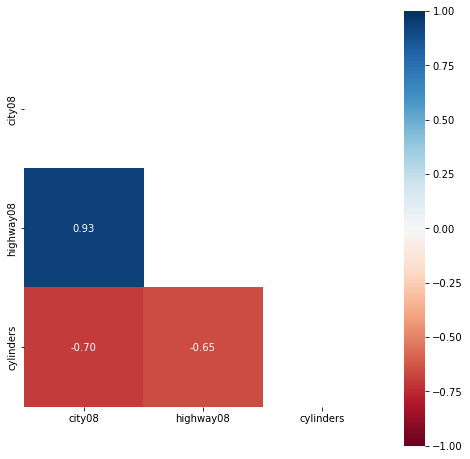

In [47]:
#Visualize the correlations in a heatmap
>>> import seaborn as sns
>>> fig, ax = plt.subplots(figsize=(8, 8))
>>> corr = fueleco[
...     ["city08", "highway08", "cylinders"]
... ].corr()
>>> mask = np.zeros_like(corr, dtype=np.bool)
>>> mask[np.triu_indices_from(mask)] = True
>>> sns.heatmap(
...     corr,
...     mask=mask,
...     fmt=".2f",
...     annot=True,
...     ax=ax,
...     cmap="RdBu",
...     vmin=-1,
...     vmax=1,
...     square=True,
... )

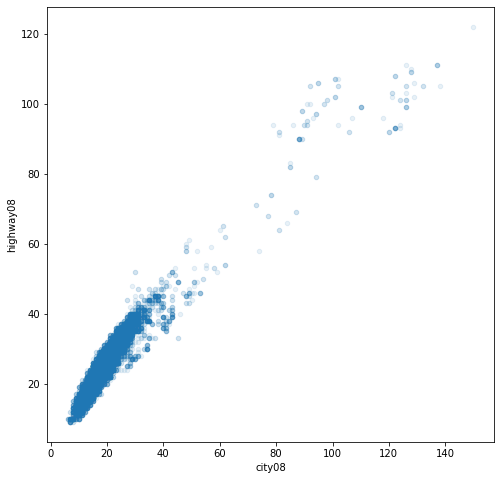

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
fueleco.plot.scatter(
    x="city08", y="highway08", alpha=0.1, ax=ax
)
fig.savefig(
    "c5-scatpan.png", dpi=300, bbox_inches="tight"
)

<AxesSubplot:xlabel='city08', ylabel='cylinders'>

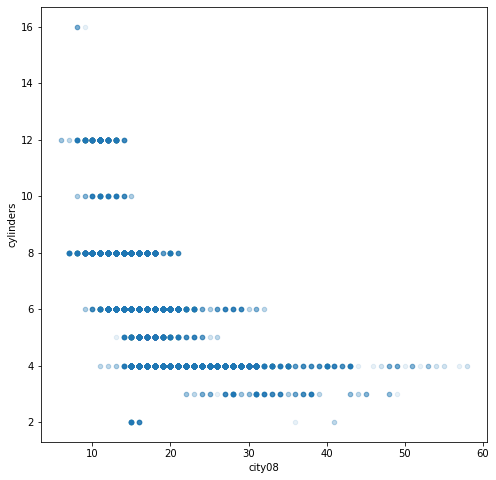

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
fueleco.plot.scatter(
    x="city08", y="cylinders", alpha=0.1, ax=ax
)

Fill in some missing values. From the cylinder plot, we can see that some of the high-end values for mileage are missing. This is because these cars tend to be electric and not have cylinders. We will fix that by filling those values in with 0:

<AxesSubplot:xlabel='city08', ylabel='cylinders'>

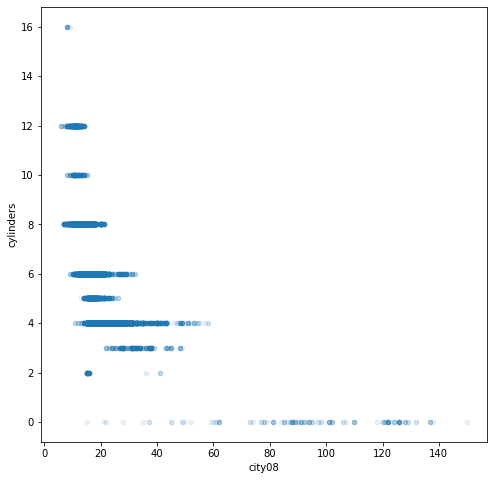

In [50]:
>>> fueleco.cylinders.isna().sum()
145
>>> fig, ax = plt.subplots(figsize=(8, 8))
>>> (
...     fueleco.assign(
...         cylinders=fueleco.cylinders.fillna(0)
...     ).plot.scatter(
...         x="city08", y="cylinders", alpha=0.1, ax=ax
...     )
... )

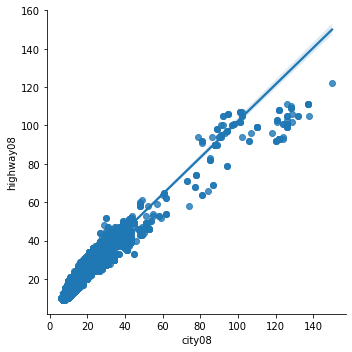

In [51]:
#adding regression line, adding line
>>> res = sns.lmplot(
...     x="city08", y="highway08", data=fueleco
... )

correlation is scale-invariant, but covariance is not. If we compare city08 to two times highway08, they have the same correlation, but the covariance changes.

A heatmap is a great way to look at correlations in aggregate. We can look for the most blue and most red cells to find the strongest correlations. Make sure you set the vmin and vmax parameters to -1 and 1, respectively, so that the coloring is correct.

Scatter plots are another way to visualize the relationships between continuous variables. It lets us see the trends that pop out. One tip that I like to give students is to make sure you set the alpha parameter to a value less than or equal to .5. This makes the points transparent and tells a different story than scatter plots with markers that are completely opaque.



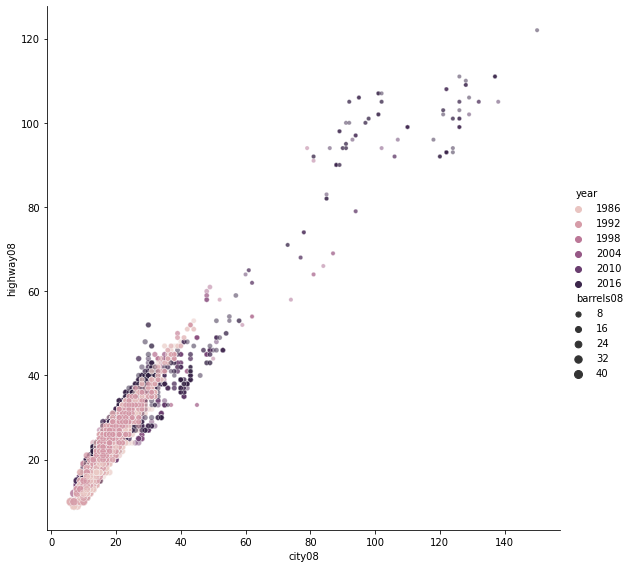

In [52]:
#If we have more variables that we want to compare, we can use seaborn to add more dimensions to a scatter plot. 
#we can color the dots by year and size them by the number of barrels the vehicle consumes. We have gone from two dimensions to four!
res = sns.relplot(
     x="city08",
     y="highway08",
     data=fueleco.assign(
         cylinders=fueleco.cylinders.fillna(0)
     ),
     hue="year",
     size="barrels08",
     alpha=0.5,
     height=8,
 )

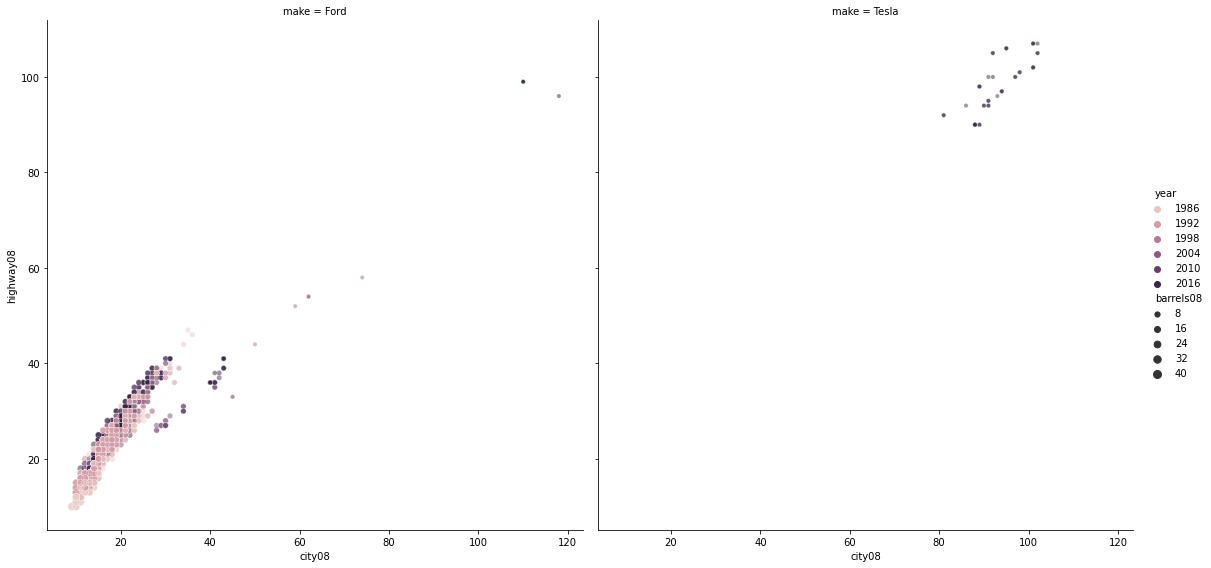

In [53]:
res = sns.relplot(
     x="city08",
     y="highway08",
     data=fueleco.assign(
         cylinders=fueleco.cylinders.fillna(0)
     ),
     hue="year",
     size="barrels08",
     alpha=0.5,
     height=8,
     col="make",
     col_order=["Ford", "Tesla"],
)

A seaborn scatter plot showing the mileage relationships colored by year, sized by the number of barrels of gas a car uses, and faceted by make. Note!

In [54]:
def generalize(ser, match_name, default):
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    ser = ser.where(seen, default)
    return ser


I reduced the cardinality of the VClass column by using the generalize function that I created. I did this because bar plots need spacing; they need to breathe. I typically will limit the number of bars to fewer than 30. The generalize function is useful for cleaning up data, and you might want to refer back to it in your own data analyses.

In [55]:
makes = ["Ford", "Tesla", "BMW", "Toyota"]

data = fueleco[fueleco.make.isin(makes)].assign(
     SClass=lambda df_: generalize(
              df_.VClass,
         [
             ("Seaters", "Car"),
             ("Car", "Car"),
             ("Utility", "SUV"),
             ("Truck", "Truck"),
             ("Van", "Van"),
             ("van", "Van"),
             ("Wagon", "Wagon"),
         ],
         "other",
     )
)


make sure that you go through the process of understanding the data. Because this can overwhelm you with the sheer amount of output, it can be tempting to skim over it, rather than to dig into it.